<a href="https://colab.research.google.com/github/AndresToro0023/Gestion-y-Almacenamiento-de-Datos/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

1.Se realiza Carga de informacion desde archivo.csv

2.Se realiza separacion de la columna DateTime, columna tipo fecha y hora se subdivide en columna de Año, mes, dia y hora

In [ ]:
df = pd.read_csv("/content/pjm_hourly_est.csv", header = 0)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df = df[['Datetime', 'Year', 'Month', 'Day', 'Hour', 'AEP','COMED', 'DAYTON','DEOK', 'DOM', 'DUQ','EKPC','FE','NI','PJME','PJMW','PJM_Load']]

4. Analisis inicial e identificacion de data frame, se realiza visualizacion de los datos faltantes por medio de mapa de calor

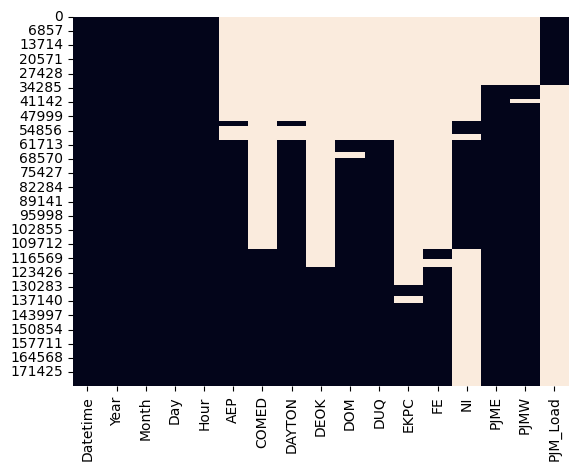

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

5. Analisis de la estructura del dataframe, cantidad de datos faltantes por variable

In [ ]:
df.isnull().sum()

Datetime         0
Year             0
Month            0
Day              0
Hour             0
AEP          56989
COMED       111765
DAYTON       56987
DEOK        120523
DOM          62073
DUQ          59194
EKPC        132928
FE          115388
NI          119812
PJME         32896
PJMW         35056
PJM_Load    145366
dtype: int64

6. Se realiza estructuracion del dataframe, donde se elimina la columna con mayor proporcion de datos faltantes "PJM_Load" y las fechas donde solo se encontraban estos datos.

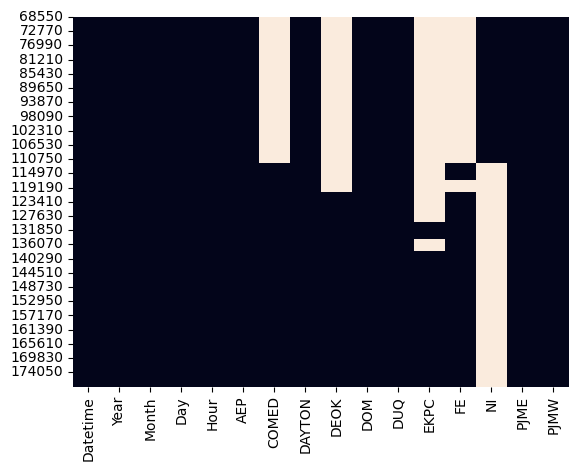

In [ ]:
data = df.copy()
columnas_a_eliminar = ["PJM_Load"]
data = data.drop(columns= columnas_a_eliminar)
sns.heatmap(data.isnull(), cbar=False)
data=data.tail(109712)
sns.heatmap(data.isnull(), cbar=False)
plt.show()

7. Resultado final de la estructuracion del dataframe eliminando la maryor proporcion de datos faltantes

In [ ]:
data.isnull().sum()

Datetime        0
Year            0
Month           0
Day             0
Hour            0
AEP             2
COMED       43215
DAYTON          0
DEOK        51973
DOM             0
DUQ             0
EKPC        64378
FE          46838
NI          66497
PJME            0
PJMW            0
dtype: int64

8. Analisis del consumo anual de MWh por estado

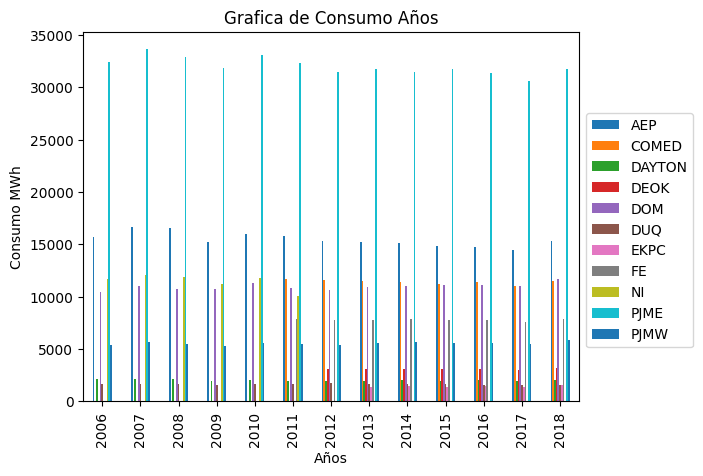

In [ ]:
mes=data.groupby('Year')[['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','NI','PJME','PJMW']].mean()
mes.plot(kind = 'bar')
plt.title("Grafica de Consumo Años")
plt.xlabel('Años')
plt.ylabel('Consumo MWh')
plt.legend(['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','NI','PJME','PJMW'],
           bbox_to_anchor = (1, 0.8))
plt.show()

9. Analisis del consumo mensual de MWh por estado

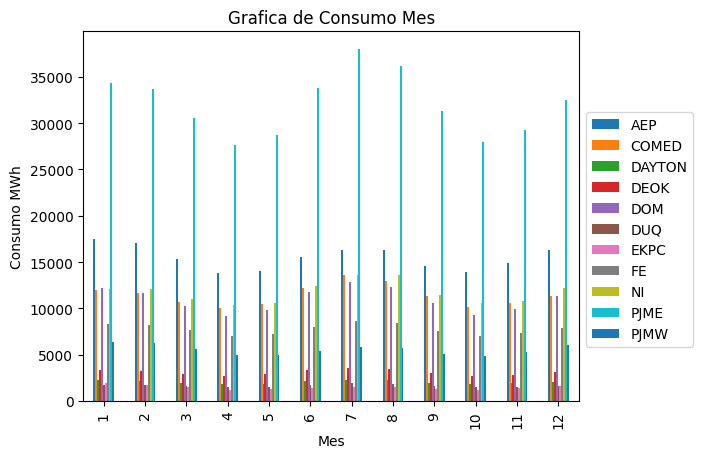

In [ ]:
mes=data.groupby('Month')[['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','NI','PJME','PJMW']].mean()
mes.plot(kind = 'bar')
plt.title("Grafica de Consumo Mes")
plt.xlabel('Mes')
plt.ylabel('Consumo MWh')
plt.legend(['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','NI','PJME','PJMW'],
           bbox_to_anchor = (1, 0.8))
plt.show()

9. Analisis del diario anual de MWh por estado

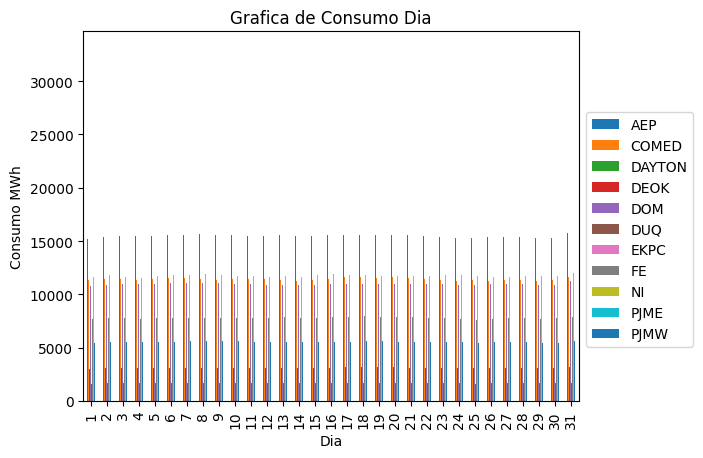

In [ ]:
mes=data.groupby('Day')[['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','NI','PJME','PJMW']].mean()
mes.plot(kind = 'bar')
plt.title("Grafica de Consumo Dia")
plt.xlabel('Dia')
plt.ylabel('Consumo MWh')
plt.legend(['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','NI','PJME','PJMW'],
           bbox_to_anchor = (1, 0.8))
plt.show()

10. Analisis del consumo horario de MWh por estado, donde se identifican las las horas de mayor consumo y/o demanda, esto con el fin de predecir la demanda energetica y garantizar la disponibilidad del recurso energetico para los usuarios.

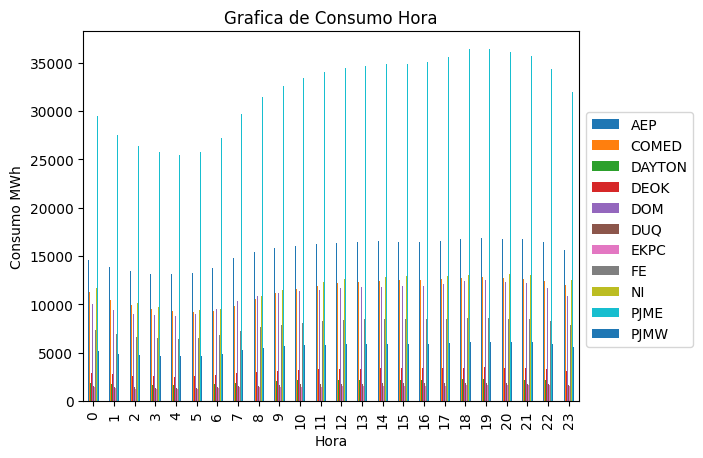

In [ ]:
mes=data.groupby('Hour')[['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','NI','PJME','PJMW']].mean()
mes.plot(kind = 'bar')
plt.title("Grafica de Consumo Hora")
plt.xlabel('Hora')
plt.ylabel('Consumo MWh')
plt.legend(['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','NI','PJME','PJMW'],
           bbox_to_anchor = (1, 0.8))
plt.show()

11. Con el fin de completar la informacion de consumo faltante para cada uno de los estados, se decide realizarlo con el promedio de consumo por cada hora.
Esto se realiza para cada uno de los estados

In [ ]:
promedio = data.groupby(['Hour'])['AEP'].mean() #Promedio

dataAEP = data.copy()
dataAEP = dataAEP[['Hour', 'AEP']]

dataAEP = dataAEP.fillna("Null") #rellenamos los datos nulos, en este caso los rellenamos con NUll
is_dataAEP = dataAEP.loc[:, 'AEP'] == 'Null'
df_Null = dataAEP.loc[is_dataAEP]
df_Null.head()

lfz = df_Null.index

for i in range(len(lfz)):
  data.at[lfz[i],'AEP']=promedio.at[dataAEP.at[lfz[i],'Hour']]#Se reemplada datos nulos con promedio de la hora


In [ ]:
dataCOMED = data.copy()
dataCOMED = dataCOMED[['Hour', 'COMED']] #Promedio
dataCOMED
dataCOMED = dataCOMED.fillna("Null") #rellenamos los datos nulos, en este caso los rellenamos con NUll
is_dataCOMED = dataCOMED.loc[:, 'COMED'] == 'Null'
df_Null = dataCOMED.loc[is_dataCOMED]
#SACAMOS EL PROMEDIO POR HORA DE COMED
promedio = data.groupby(['Hour'])['COMED'].mean()
#DEFINIMOS LOS INDICES
lfz=df_Null.index
for i in range(len(lfz)):
  data.at[lfz[i], 'COMED']=promedio.at[dataCOMED.at[lfz[i], 'Hour']]#Se reemplada datos nulos con promedio de la hora


In [ ]:
dataDAYTON = data.copy()
dataDAYTON = dataDAYTON[['Hour', 'DAYTON']]
dataDAYTON
dataDAYTON = dataDAYTON.fillna("Null") #rellenamos con Null a los velores NAN
is_dataDAYTON = dataDAYTON.loc[:, 'DAYTON'] == 'Null'
df_Null = dataDAYTON.loc[is_dataDAYTON]
#SACAMOS EL PROMEDIO POR HORA DE COMED
promedio = data.groupby(['Hour'])['DAYTON'].mean()
#DEFINIMOS LOS INDICES
lfz=df_Null.index
for i in range(len(lfz)):
  data.at[lfz[i], 'DAYTON']=promedio.at[dataCOMED.at[lfz[i], 'Hour']]# Dato buscado para reemplazar


In [ ]:
dataDEOK = data.copy()
dataDEOK = dataDEOK[['Hour', 'DEOK']]
dataDEOK
dataDEOK = dataDEOK.fillna("Null") #rellenamos con Null a los velores NAN
is_dataDEOK = dataDEOK.loc[:, 'DEOK'] == 'Null'
df_Null = dataDEOK.loc[is_dataDEOK]
#SACAMOS EL PROMEDIO POR HORA DE COMED
promedio = data.groupby(['Hour'])['DEOK'].mean()
#DEFINIMOS LOS INDICES
lfz=df_Null.index
for i in range(len(lfz)):
  data.at[lfz[i], 'DEOK']=promedio.at[dataCOMED.at[lfz[i], 'Hour']]# Dato buscado para reemplazar


In [ ]:
dataEKPC = data.copy()
dataEKPC = dataEKPC[['Hour', 'EKPC']]
dataEKPC
dataEKPC = dataEKPC.fillna("Null") #rellenamos con Null a los velores NAN
is_dataEKPC = dataEKPC.loc[:, 'EKPC'] == 'Null'
df_Null = dataEKPC.loc[is_dataEKPC]
#SACAMOS EL PROMEDIO POR HORA DE COMED
promedio = data.groupby(['Hour'])['EKPC'].mean()
#DEFINIMOS LOS INDICES
lfz=df_Null.index
for i in range(len(lfz)):
  data.at[lfz[i], 'EKPC']=promedio.at[dataCOMED.at[lfz[i], 'Hour']]# Dato buscado para reemplazar

In [ ]:
dataFE = data.copy()
dataFE = dataFE[['Hour', 'FE']]
dataFE
dataFE = dataFE.fillna("Null") #rellenamos con Null a los velores NAN
is_dataFE = dataFE.loc[:, 'FE'] == 'Null'
df_Null = dataFE.loc[is_dataFE]
#SACAMOS EL PROMEDIO POR HORA DE COMED
promedio = data.groupby(['Hour'])['FE'].mean()
#DEFINIMOS LOS INDICES
lfz=df_Null.index
for i in range(len(lfz)):
  data.at[lfz[i], 'FE']=promedio.at[dataCOMED.at[lfz[i], 'Hour']]# Dato buscado para reemplazar

In [ ]:
dataNI = data.copy()
dataNI = dataNI[['Hour', 'NI']]
dataNI
dataNI = dataNI.fillna("Null") #rellenamos con Null a los velores NAN
is_dataNI = dataNI.loc[:, 'NI'] == 'Null'
df_Null = dataNI.loc[is_dataNI]
#SACAMOS EL PROMEDIO POR HORA DE COMED
promedio = data.groupby(['Hour'])['NI'].mean()
#DEFINIMOS LOS INDICES
lfz=df_Null.index
for i in range(len(lfz)):
  data.at[lfz[i], 'NI']=promedio.at[dataCOMED.at[lfz[i], 'Hour']]# Dato buscado para reemplazar

12 Se realiza verificacion de la imputacion de datos para cada estado, donde se observa que el proceso fue ralizado de forma exitosa, el dataframe ya no contiene datos nulos

In [ ]:
data.isnull().sum()

Datetime    0
Year        0
Month       0
Day         0
Hour        0
AEP         0
COMED       0
DAYTON      0
DEOK        0
DOM         0
DUQ         0
EKPC        0
FE          0
NI          0
PJME        0
PJMW        0
dtype: int64

13. Como resultado generamos observamos de forma completa el consumo horario en MWh para cada uno de los estados

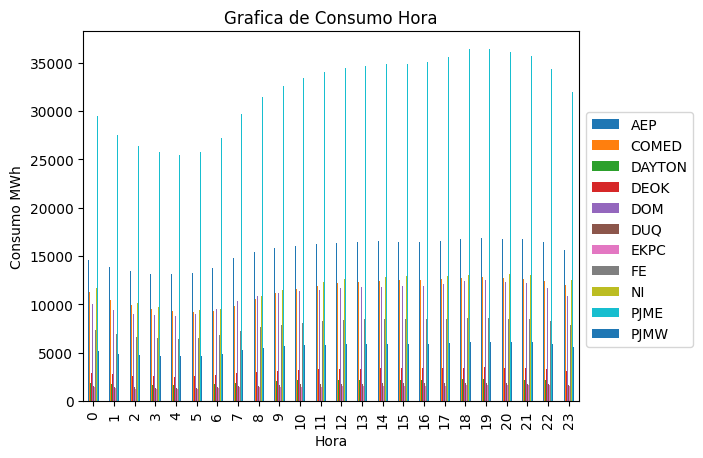

In [ ]:
mes=data.groupby('Hour')[['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','NI','PJME','PJMW']].mean()
mes.plot(kind = 'bar')
plt.title("Grafica de Consumo Hora")
plt.xlabel('Hora')
plt.ylabel('Consumo MWh')
plt.legend(['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','NI','PJME','PJMW'],
           bbox_to_anchor = (1, 0.8))
plt.show()

14. Descargamos el dataframe completo en archivo csv

In [ ]:
data.to_csv('hcsv.csv')